# PCA

In [2]:
import numpy as np
from scipy.sparse.linalg import svds

In [12]:
class PCA:
    def __init__(self, n_components, tol=0.0, random_seed=0):
        self.n_components = n_components
        self.tol = tol
        self.random_state_ = np.random.RandomState(random_seed)
        
    def fit(self, X):
        v0 = self.random_state_.randn(min(X.shape))
        xbar = X.mean(axis=0) # mean of data
        Y = X - xbar
        S = np.dot(Y.T, Y) #covariance matrix
        U, Sigma, VT = svds(S,k=self.n_components,tol=self.tol,v0=v0)
        
        self.VT_ = VT[::-1,:] # invert order of column
        
    def transform(self, X):
        return self.VT_.dot(X.T).T
    

In [11]:
A = np.array([[1,2,3],[3,4,5]])
print(A)
A[::-1,:]

[[1 2 3]
 [3 4 5]]


array([[3, 4, 5],
       [1, 2, 3]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv

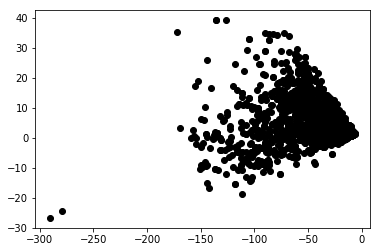

In [18]:
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

model = PCA(n_components=2)
model.fit(X)

Y = model.transform(X)

plt.scatter(Y[:, 0], Y[:, 1], color="k")